# Котов, РИМ-181226

# Линейная регрессия

Задача прогноза вещественного признака по прочим признакам (задача восстановления регрессии) решается минимизацией квадратичной ошибки. Рассмотрим линейную регресси на примере листка ириса. Будем предсказывать длину листка по его ширине. x - ширина листа, y - длина листка.

In [66]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

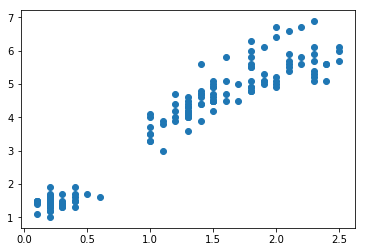

In [67]:
data = load_iris().data
x_data = data[:,3]
y_data = data[:,2]
plt.scatter(x_data, y_data)
plt.show()

Напишите функцию, которая по двум параметрам  $w_0$ и $w_1$ вычисляет квадратичную ошибку приближения зависимости роста $y$ от веса $x$ прямой линией $y = w_0 + w_1 * x$:

$$Err(w_0, w_1) = \frac{1}{n}\sum_{i=1}^n {(y_i - (w_0 + w_1 * x_i))}^2 $$ Здесь $n$ – число наблюдений в наборе данных, $y_i$ и $x_i$ – рост и вес $i$-ого человека в наборе данных.

In [68]:
def get_y(w0, w1, x):
    return w0 + w1*x

In [69]:
def squarErr(w0, w1):
    return sum(map(lambda x, y: (y - get_y(w0, w1, x)) ** 2, x_data, y_data))

Возьмите параметры $\omega_0$ - свободный член и $\omega_1$ - наклон прямой и постройте две любые прямые, которые быдут некоторым образом описывать зависмость ширины листа от его длины. Представьте графически.

(0, 8)

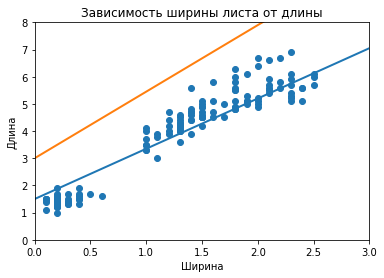

In [70]:
x_range = np.linspace(0.0,4)
y1 = get_y(1.5, 1.85, x_range)
y2 = get_y(3.0, 2.45, x_range)

plt.scatter(x_data, y_data)
plt.plot(x_range, y1, lw = 2)
plt.plot(x_range, y2, lw = 2)
plt.xlabel(u'Ширина')
plt.ylabel(u'Длина')
plt.title(u'Зависимость ширины листа от длины')
plt.xlim(0, 3.0)
plt.ylim(0, 8)

Минимизация квадратичной функции ошибки - относительная простая задача, поскольку функция выпуклая. Для такой задачи существует много методов оптимизации. Рассмотрим, как функция ошибки зависит от одного параметра (наклон прямой), если второй параметр (свободный член) зафиксировать.

Постройте график зависимости функции ошибки от параметра $w_1$ при $w_0$ = 0.

Text(0,0.5,u'\u0424\u0443\u043d\u043a\u0438\u0446\u044f \u043e\u0448\u0438\u0431\u043a\u0438')

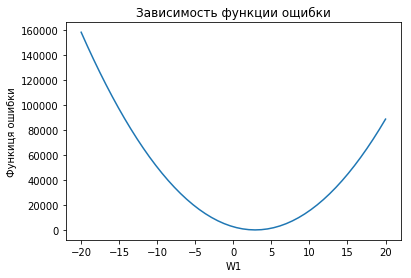

In [71]:
w0 = 0
w1 = np.linspace(-20,20)
error = squarErr(w0, w1)

plt.plot(w1, error)
plt.title(u'Зависимость функции ощибки')
plt.xlabel(u'W1')
plt.ylabel(u'Функиця ошибки')

С помощью метода minimize_scalar из scipy.optimize найдите минимум функции, определенной выше, для значений параметра  $w_1$ в диапазоне [-10,10]. Проведите на графике прямую, соответствующую значениям параметров ($w_0$, $w_1$) = (50, $w_1\_opt$), где $w_1\_opt$ – найденное в оптимальное значение параметра $w_1$.

In [72]:
from scipy.optimize import minimize_scalar

(0, 8)

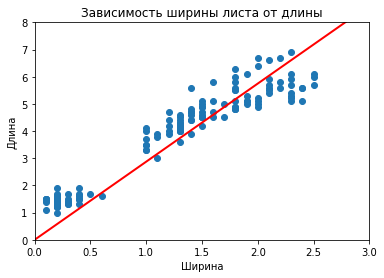

In [74]:
w0 = 0
w1 = minimize_scalar(lambda x: squarErr(w0, x), bounds = [-10,10])

x_range = np.linspace(0.0,4)
y_line = get_y(w0, w1.x, x_range)

plt.scatter(x_data, y_data)
plt.plot(x_range, y_line, lw = 2,color='red')
plt.xlabel(u'Ширина')
plt.ylabel(u'Длина')
plt.title(u'Зависимость ширины листа от длины')
plt.xlim(0, 3.0)
plt.ylim(0, 8)

В связи с тем, что у нас требуется найти минимальное значение функции по $w_0$, $w_1$ следовательно функция ошибки будет находиться в трехмерном пространстве.
Пример построения трехмерных графиков находится ниже.

In [75]:
from mpl_toolkits.mplot3d import Axes3D

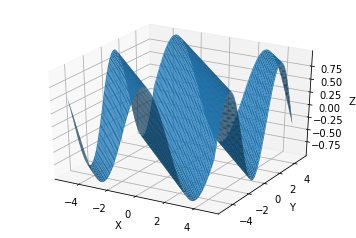

In [76]:
fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis

X = np.arange(-5, 5, 0.1)
Y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(X, Y)
Z = np.sin(X + Y)


surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

Постройте график зависимости функции ошибки в трехмерном пространстве от параметров $\omega_0$ и $\omega_1$.

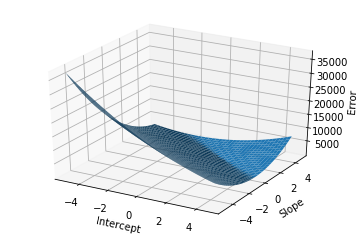

In [78]:
fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis

# Создаем массивы NumPy с координатами точек по осям X и У. 
# Используем метод meshgrid, при котором по векторам координат 
# создается матрица координат. Задаем нужную функцию Z(x, y).
W0 = np.arange(-5, 5, 0.25)
W1 = np.arange(-5, 5, 0.25)
W0, W1 = np.meshgrid(W0, W1)
ERROR = squarErr(W0, W1)

# Наконец, используем метод *plot_surface* объекта 
# типа Axes3DSubplot. Также подписываем оси.
surf = ax.plot_surface(W0, W1, ERROR)
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Error')
plt.show()

Используя метод minimize найдите минимум функции. Диапазон поиска подберите самостоятельно. Начальная точка - (0,0). Постройте прямую на графике с данными.

In [79]:
from scipy.optimize import minimize

In [80]:
w0_opt, w1_opt = minimize(lambda w: squarErr(w[0], w[1]), (0,0), bounds = [(-100,100),(-5, 5)], method='L-BFGS-B').x

(0, 8)

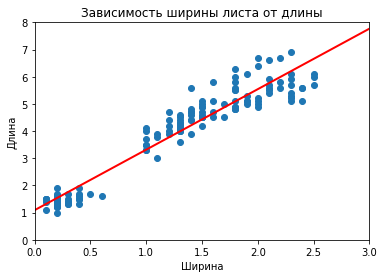

In [81]:
x_range = np.linspace(0.0,4)
y_line = get_y(w0_opt, w1_opt, x_range)

plt.scatter(x_data, y_data)
plt.plot(x_range, y_line, lw = 2,color='red')
plt.xlabel(u'Ширина')
plt.ylabel(u'Длина')
plt.title(u'Зависимость ширины листа от длины')
plt.xlim(0, 3.0)
plt.ylim(0, 8)

Проверьте полученные результаты аналитическим методом поиска корней СЛАУ использованным на лекции.

In [87]:
x_data_ones = np.vstack([x_data, np.ones(len(x))]).T

In [102]:
roots = np.linalg.lstsq(x_data_ones, y_data,rcond=None)
m, c = roots[0]
print(c,m)
print(w0_opt, w1_opt)

(1.0905721458773783, 2.225885306553912)
(1.0905721300986313, 2.2258853123951465)
